<a href="https://colab.research.google.com/github/trungsi/DS-project---Road-accidents-in-France/blob/master/Linear_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/DataScience project/Road accidents - model.csv', 'r', encoding='ISO-8859-1') as f:
  df = pd.read_csv(f, index_col=0)

df.info()

Mounted at /content/drive


<ipython-input-2-4b98f2bad7af>:6: DtypeWarning: Columns (5,11,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034545 entries, 0 to 1034544
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Num_Acc     1034545 non-null  int64  
 1   an          1034545 non-null  int64  
 2   mois        1034545 non-null  int64  
 3   jour        1034545 non-null  int64  
 4   hrmn        1034545 non-null  object 
 5   lum         1034545 non-null  int64  
 6   agg         1034545 non-null  int64  
 7   int         1034545 non-null  int64  
 8   atm         1034472 non-null  float64
 9   col         1034526 non-null  float64
 10  com         1034545 non-null  object 
 11  adr         908057 non-null   object 
 12  gps         453015 non-null   object 
 13  lat         607560 non-null   object 
 14  long        607556 non-null   object 
 15  dep         1034545 non-null  object 
 16  grav_mean   1034545 non-null  float64
 17  grav_total  1034545 non-null  int64  
 18  nb_usagers  1034545 no

In [3]:
# to show full float values instead of exponential format
pd.set_option('float_format', '{:f}'.format)
print(df.head())
print(df.grav_mean.describe())

        Num_Acc  an  mois  jour  hrmn  lum  agg  int      atm      col  ...  \
0  200600000001   6     1     4  1545    1    2    2 1.000000 3.000000  ...   
1  200600000002   6     1     6   805    2    2    2 4.000000 3.000000  ...   
2  200600000003   6     1     9  1340    1    2    1 1.000000 6.000000  ...   
3  200600000004   6     1    10  1625    2    2    1 8.000000 3.000000  ...   
4  200600000005   6     1    24  1120    1    1    1 1.000000 2.000000  ...   

  long dep grav_mean grav_total nb_usagers        date  nb_jour  nb_semaine  \
0  NaN  10  2.000000          6          3  2006-01-04        4           1   
1  NaN  10  3.000000          6          2  2006-01-06        6           1   
2  NaN  10  3.500000          7          2  2006-01-09        9           2   
3  NaN  10  1.500000          3          2  2006-01-10       10           2   
4  NaN  10  1.500000          3          2  2006-01-24       24           4   

      surf vma  
0 1.000000 NaN  
1 2.000000 NaN  

<Axes: xlabel='grav_mean', ylabel='Count'>

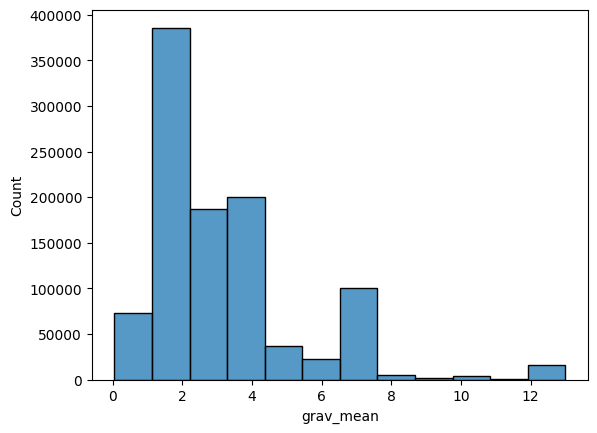

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#plt.hist(df.grav_mean);
sns.histplot(df, x='grav_mean', bins=12)

# mean gravity varies from 0 to 13 with mean around 3 and majority (75%) are less than 4

# Data is skewed

# It may be difficult to detect outlier.


# As first attempt, take hypothese that time and geographic location have not (important) impact on accidents (number and gravity) 

# Remove columns not useful for the model


In [5]:
df = df.drop(columns=['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'adr', 'gps', 'lat', 'long', 'com', 'grav_total', 'date', 'nb_jour', 'nb_semaine', 'vma'])
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032546 entries, 0 to 1034544
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   lum         1032546 non-null  int64  
 1   agg         1032546 non-null  int64  
 2   int         1032546 non-null  int64  
 3   atm         1032546 non-null  float64
 4   col         1032546 non-null  float64
 5   dep         1032546 non-null  object 
 6   grav_mean   1032546 non-null  float64
 7   nb_usagers  1032546 non-null  int64  
 8   surf        1032546 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 78.8+ MB


<ipython-input-6-57af2c02986e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),  annot=True, cmap="RdBu_r", center =0);


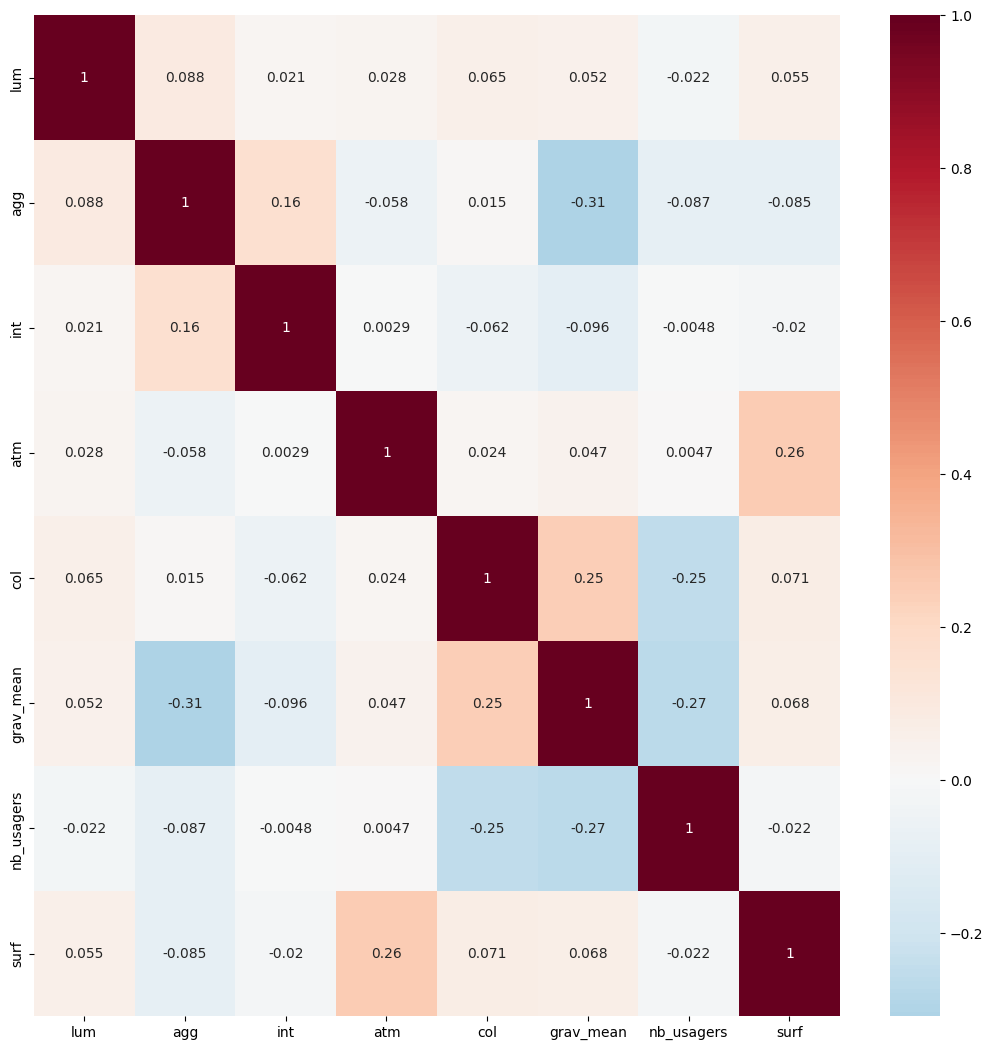

In [6]:
import seaborn as sns

plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),  annot=True, cmap="RdBu_r", center =0);

# Number of usagers is highly influent on gravity. 
# The Location (agglomeration or hors agglomeration) is the second most important feature. 
# Collision type comes next as the third important feature.
# All other features are not important. Can they be excluded from the model ?

In [7]:
# convert categorical variables which are currently encoded as numeric to string type
# only nb_usagers is numeric
df = df.astype({'lum' : 'str', 'agg': 'str', 'int': 'str', 'atm': 'str', 'col': 'str', 'surf': 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032546 entries, 0 to 1034544
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   lum         1032546 non-null  object 
 1   agg         1032546 non-null  object 
 2   int         1032546 non-null  object 
 3   atm         1032546 non-null  object 
 4   col         1032546 non-null  object 
 5   dep         1032546 non-null  object 
 6   grav_mean   1032546 non-null  float64
 7   nb_usagers  1032546 non-null  int64  
 8   surf        1032546 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 78.8+ MB


# convert categorical variables to numeric using dummy

# the dep (department) columns will be transformed into about 100 new columns. 

# That's why we remove comm (communes) column from the model as it has > 30K different values. Including this column will require extra processing.

# We'll keep the model simple for the moment.

In [8]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032546 entries, 0 to 1034544
Columns: 158 entries, grav_mean to surf_9.0
dtypes: float64(1), int64(1), uint8(156)
memory usage: 177.2 MB


In [9]:
df.head()

,grav_mean,nb_usagers,lum_-1,lum_1,lum_2,lum_3,lum_4,lum_5,agg_1,agg_2,...,surf_0.0,surf_1.0,surf_2.0,surf_3.0,surf_4.0,surf_5.0,surf_6.0,surf_7.0,surf_8.0,surf_9.0
0,2.000000,3,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,3.000000,2,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3.500000,2,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1.500000,2,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1.500000,2,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# separation of features and target variables

In [10]:
target = df.grav_mean
feats = df.drop(columns=['grav_mean'])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=123)

In [13]:
# try with simple linear regression
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

print("Coefficient of determination of the model on train data:", slr.score(X_train, y_train))
print("Coefficient of determination of the model on test data:", slr.score(X_test, y_test))

Coefficient of determination of the model on train data: 0.3078818238225315
Coefficient of determination of the model on test data: 0.30738189446959074


# The score of the first model is not very good

[-26.07617188   2.26171875   3.06445312   3.93554688   7.67773438]


<Axes: ylabel='Count'>

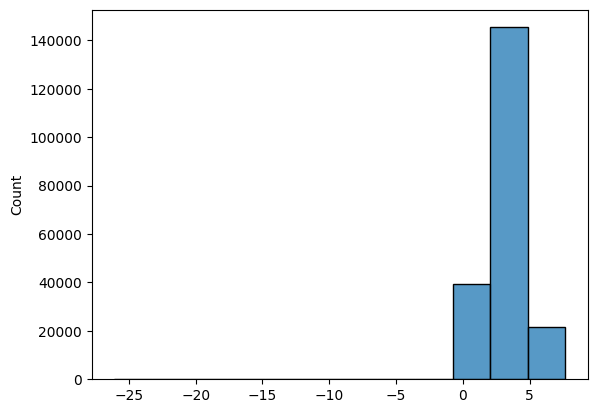

In [21]:
import numpy as np
print(np.percentile(y_test_pred, q=[0, 25, 50, 75, 100]))
sns.histplot(y_test_pred, bins=12)

# We expect the predicted values in range of [0-13] but it is not the case. However, majority of predicted values fall into the same range of majority of real values.  

In [14]:
y_test_pred = slr.predict(X_test)
import math
print('RMSE= ', math.sqrt(((y_test_pred - y_test)**2).mean()))

RMSE=  1.8889659387733246


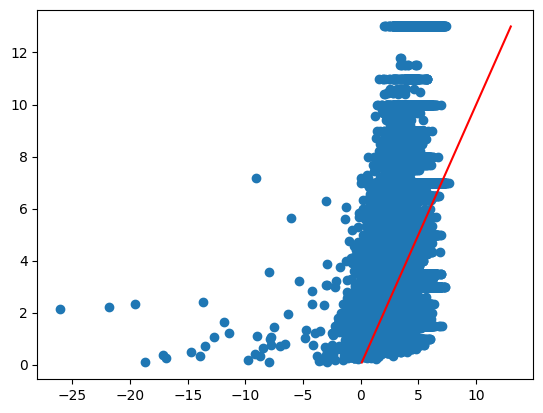

In [23]:
plt.scatter(y_test_pred, y_test)
plt.plot((y_test.min(),y_test.max()), (y_test.min(),y_test.max()), color='red')

In [24]:
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(alphas=[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])

ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])

In [25]:
print(ridge_reg.alpha_)
print(ridge_reg.score(X_train, y_train))
print(ridge_reg.score(X_test, y_test))

50.0
0.3081217841726944
0.3075892879732094


In [26]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(cv=10)
model_lasso.fit(X_train, y_train)

LassoCV(cv=10)

In [27]:
print(model_lasso.score(X_train, y_train))
print(model_lasso.score(X_test, y_test))

0.3060678489433051
0.3059596102208346


# Some tests with other linear regression algorithmes (Ridge, Lasso) did not bring any improvement.

# So maybe 

*   Linear regression is not suitable for this problem ?
*   Or feature selection needs to be improved ?
*   Target prediction needs to be reconsidered ?  



Lets try with some other algorithmes...